In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [46]:
# df = pd.read_csv('./iris.csv')
df = sns.load_dataset('iris')
print(df)
# sepal_length = df['sepal_length']
sepal_length = df['sepal_length'].to_numpy().reshape(-1, 1)
range = np.arange(len(sepal_length))

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [47]:
def min_max(number, min_range=0, max_range=1):
    ''' desc: this function is used for return value of number after normalization of data using min-max technique
        function_name: min_max
        no. of argument: 3
        argument type: list,num,num
    '''

    min_no = min(number)
    max_no = max(number)

    return (min_range + ((number-min_no)*(max_range-min_range)) / (max_no-min_no))

def z_score(number):
    ''' desc: this function is used for return value of number after standardization of data using z-score technique 
        function_name: z_score
        no. of argument: 1
        argument type: number
    '''
    mean = np.mean(number)
    std_dev = np.std(number)
    
    return (number-mean)/std_dev


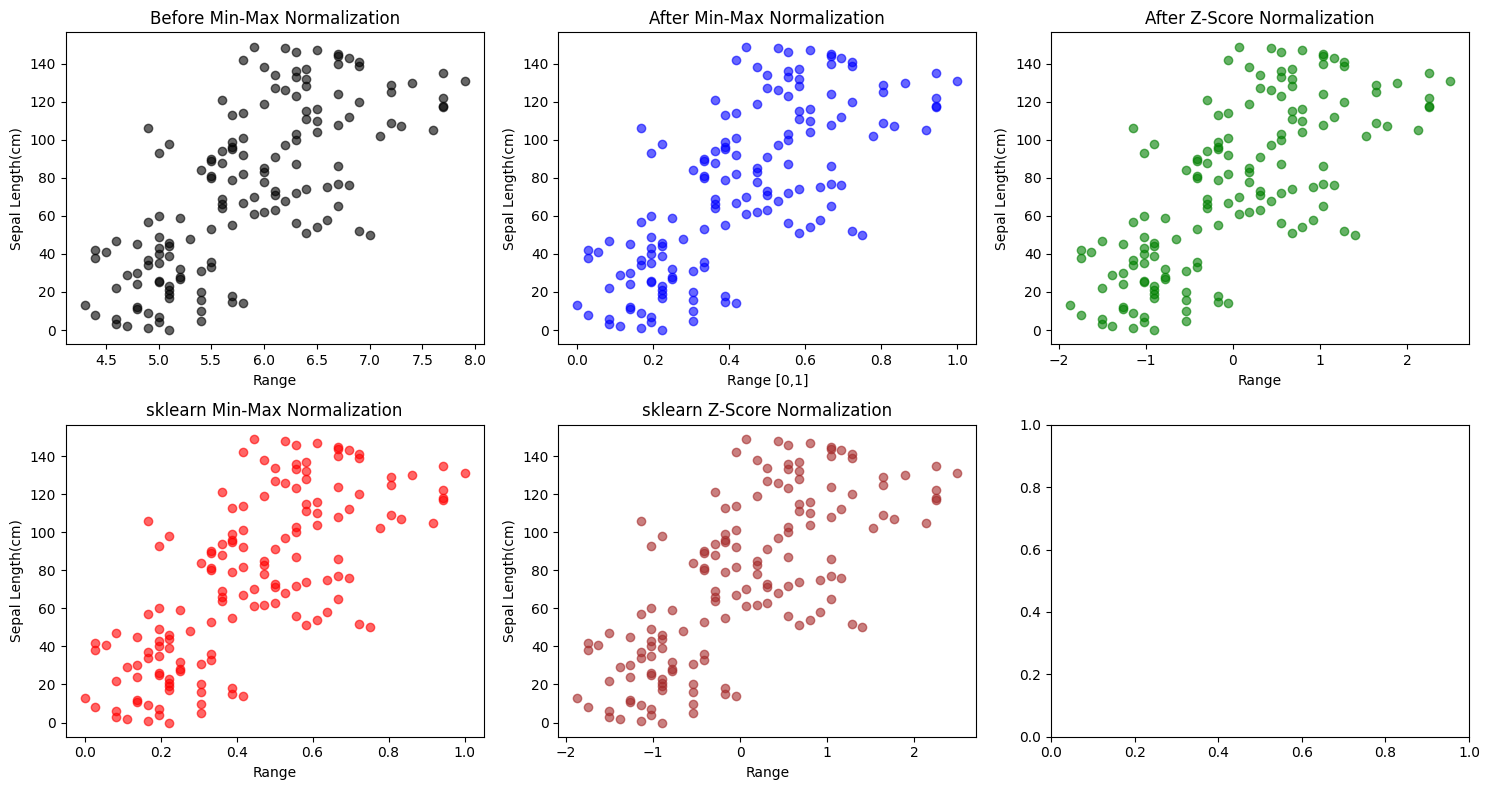

In [48]:
fix, axes = plt.subplots(2,3, figsize=(15,8))


# Original Data
axes[0,0].scatter(df['sepal_length'], range, color = 'black', alpha = 0.6)
# axes[0,0].boxplot(df['sepal_length'], patch_artist=True, boxprops=dict(facecolor='yellow', alpha=0.6))
axes[0,0].set_title('Before Min-Max Normalization')
axes[0,0].set_xlabel('Range')
axes[0,0].set_ylabel('Sepal Length(cm)')


# Custom Min-Max
new_sepal_length1 = min_max(df.sepal_length)
axes[0,1].scatter(new_sepal_length1, range, color = 'blue', alpha = 0.6)
# axes[0,1].boxplot(new_sepal_length, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.6))
axes[0,1].set_title('After Min-Max Normalization')
axes[0,1].set_xlabel('Range [0,1]')
axes[0,1].set_ylabel('Sepal Length(cm)')

# Custom Z-Score
new_sepal_length2 = z_score(df.sepal_length)
axes[0,2].scatter(new_sepal_length2, range, c="green", alpha=0.6)
axes[0,2].set_title("After Z-Score Normalization")
axes[0,2].set_xlabel("Range")
axes[0,2].set_ylabel("Sepal Length(cm)")

# sklearn Min-Max
minmax_scaler = MinMaxScaler()
sepal_minmax = minmax_scaler.fit_transform(sepal_length)
axes[1,0].scatter(sepal_minmax, range, color="red", alpha=0.6)
axes[1,0].set_title("sklearn Min-Max Normalization")
axes[1,0].set_xlabel("Range")
axes[1,0].set_ylabel("Sepal Length(cm)")

#sklearn Z-Score
zscore_scaler = StandardScaler()
sepal_zscore = zscore_scaler.fit_transform(sepal_length)
axes[1,1].scatter(sepal_zscore, range, color="brown", alpha=0.6)
axes[1,1].set_title("sklearn Z-Score Normalization")
axes[1,1].set_xlabel("Range")
axes[1,1].set_ylabel("Sepal Length(cm)")

plt.tight_layout()
plt.show()

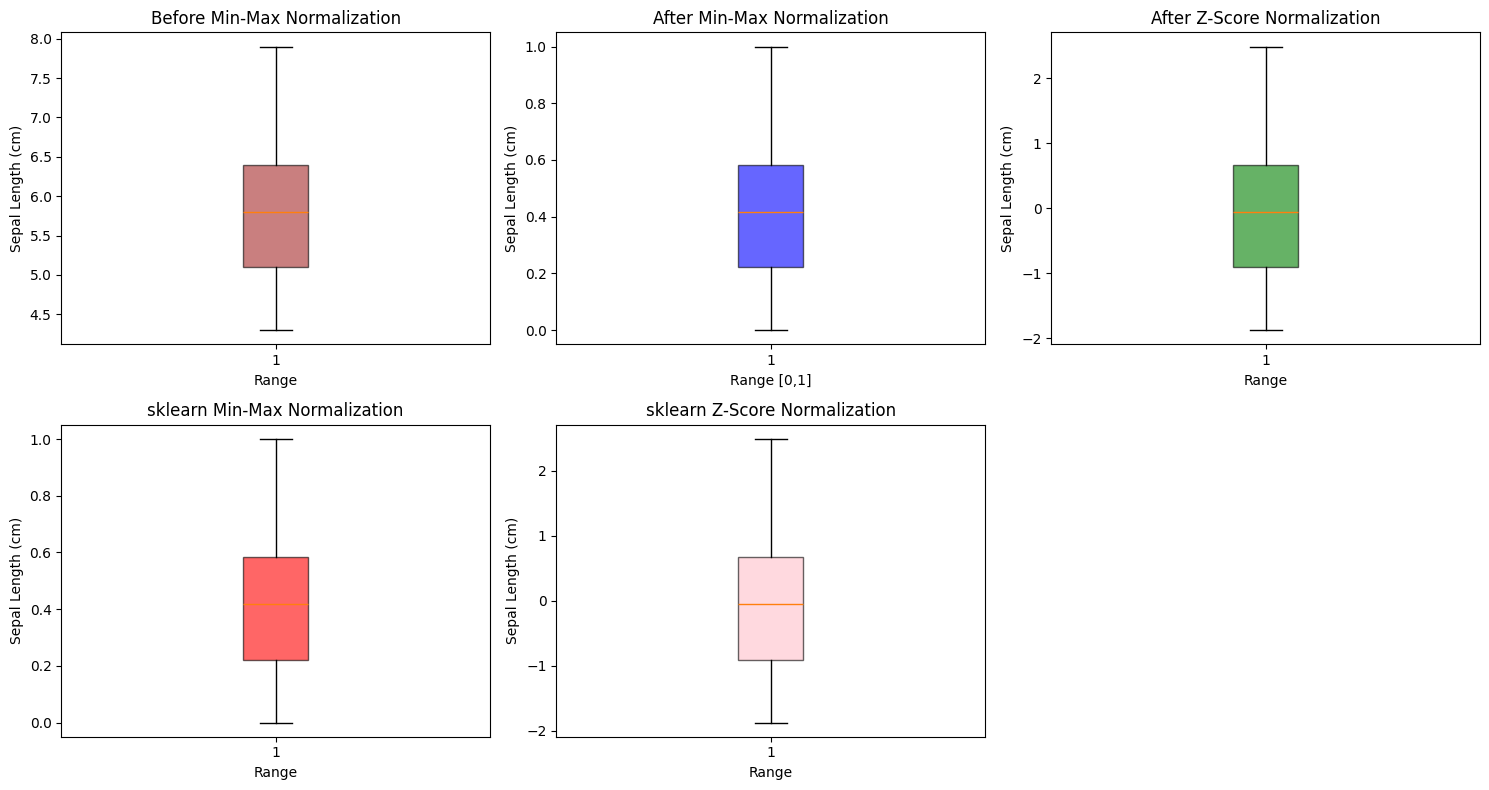

In [49]:

import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Original Data
axes[0,0].boxplot(df['sepal_length'], patch_artist=True,
                  boxprops=dict(facecolor='brown', alpha=0.6))
axes[0,0].set_title('Before Min-Max Normalization')
axes[0,0].set_xlabel('Range')
axes[0,0].set_ylabel('Sepal Length (cm)')

# Custom Min-Max
new_sepal_length1 = min_max(df.sepal_length)
axes[0,1].boxplot(new_sepal_length1, patch_artist=True,
                  boxprops=dict(facecolor='blue', alpha=0.6))
axes[0,1].set_title('After Min-Max Normalization')
axes[0,1].set_xlabel('Range [0,1]')
axes[0,1].set_ylabel('Sepal Length (cm)')

# Custom Z-Score
new_sepal_length2 = z_score(df.sepal_length)
axes[0,2].boxplot(new_sepal_length2, patch_artist=True,
                  boxprops=dict(facecolor='green', alpha=0.6))
axes[0,2].set_title('After Z-Score Normalization')
axes[0,2].set_xlabel('Range')
axes[0,2].set_ylabel('Sepal Length (cm)')

# sklearn Min-Max
minmax_scaler = MinMaxScaler()
sepal_minmax = minmax_scaler.fit_transform(sepal_length)
axes[1,0].boxplot(sepal_minmax, patch_artist=True,
                  boxprops=dict(facecolor='red', alpha=0.6))
axes[1,0].set_title('sklearn Min-Max Normalization')
axes[1,0].set_xlabel('Range')
axes[1,0].set_ylabel('Sepal Length (cm)')

# sklearn Z-Score
zscore_scaler = StandardScaler()
sepal_zscore = zscore_scaler.fit_transform(sepal_length)
axes[1,1].boxplot(sepal_zscore, patch_artist=True,
                  boxprops=dict(facecolor='pink', alpha=0.6))
axes[1,1].set_title('sklearn Z-Score Normalization')
axes[1,1].set_xlabel('Range')
axes[1,1].set_ylabel('Sepal Length (cm)')

# Hide last empty subplot (bottom right)
axes[1,2].axis("off")

plt.tight_layout()
plt.show()